In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df[df.duplicated()]
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
print("Categories in gender ", end=": ")
print(df['gender'].unique())

print("Categories in race/ethnicity ", end=": ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education ", end=": ")
print(df['parental level of education'].unique())

print("Categories in lunch ", end=": ")
print(df['lunch'].unique())

print("Categories in test preparation course ", end=": ")
print(df['test preparation course'].unique())

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


In [25]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Categorical Features : {categorical_features}")
print(f"Numeric Features : {numeric_features}")

Categorical Features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numeric Features : ['math score', 'reading score', 'writing score']


In [26]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()

print(f"NUmber of students with full marks in math {math_full}")
print(f"NUmber of students with full marks in reading {reading_full}")
print(f"NUmber of students with full marks in writitng {writing_full}")

NUmber of students with full marks in math 7
NUmber of students with full marks in reading 17
NUmber of students with full marks in writitng 14


In [33]:
reading_less_than_20 = df[df['reading score'] <= 20]['average_score'].count()
math_less_than_20 = df[df['math score'] <= 20]['average_score'].count()
writing_less_than_20 = df[df['writing score'] <= 20]['average_score'].count()

print(f"NUmber of students with less than 20 marks in math {math_less_than_20}")
print(f"NUmber of students with less than 20 marks in reading {reading_less_than_20}")
print(f"NUmber of students with less than 20 marks in writitng {writing_less_than_20}")

NUmber of students with less than 20 marks in math 4
NUmber of students with less than 20 marks in reading 1
NUmber of students with less than 20 marks in writitng 3


<Axes: xlabel='average_score', ylabel='Count'>

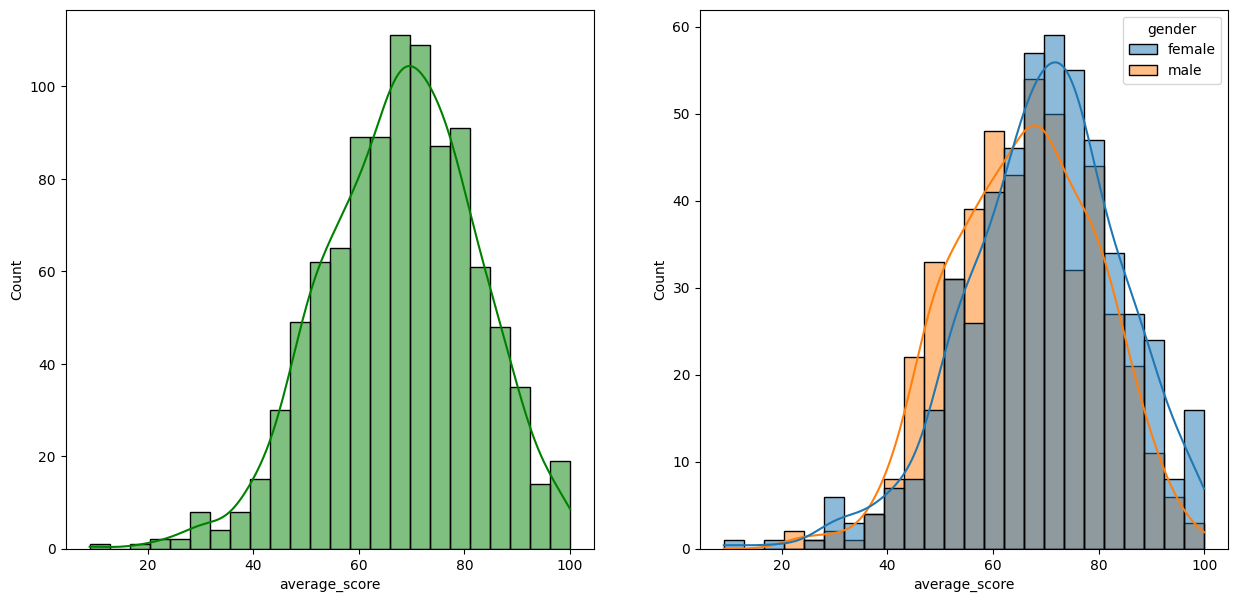

In [37]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['average_score'], color='g', kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['average_score'],hue=df['gender'], kde=True)

<Axes: xlabel='total_score', ylabel='Count'>

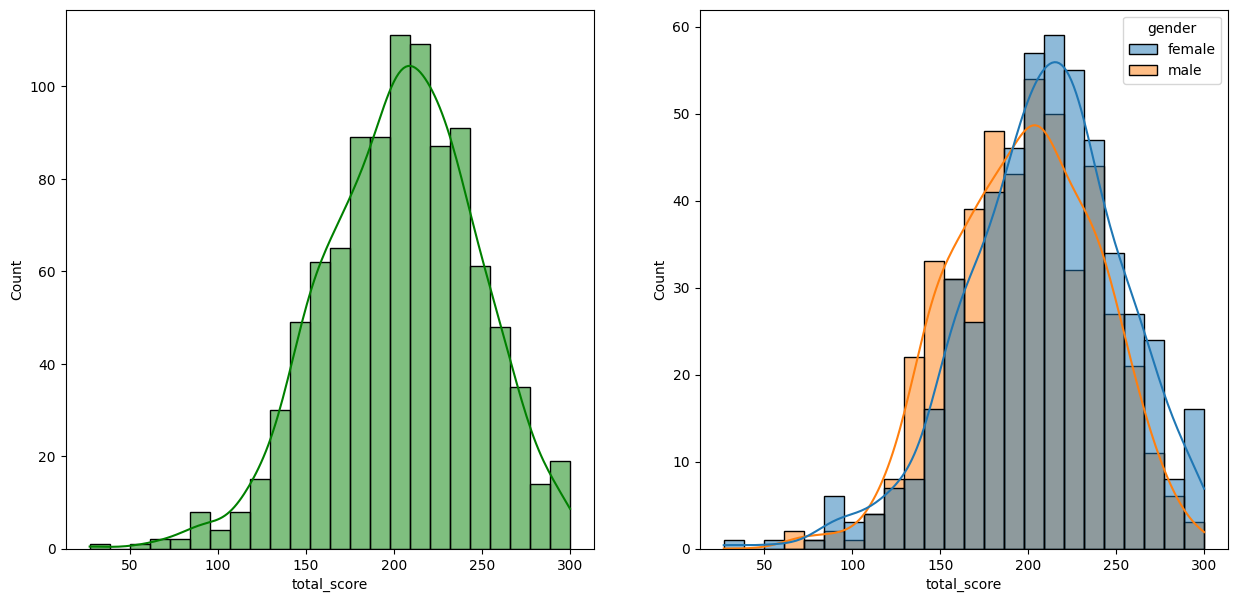

In [38]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['total_score'], color='g', kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['total_score'],hue=df['gender'], kde=True)

In [40]:
df.to_csv('eda_stud.csv')